# **Project 1**, APS1070 Summer 2022

## **Basic Principles and Models**

# Project 1 [10 Marks] 

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
#printing the dataset
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? **30**
* How many observations have a 'mean area' of greater than 700? **171**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**

In [ ]:
print(dataset.feature_names)
print(len(dataset.feature_names))
print(dataset.feature_names.tolist().index('mean area'))  #column representing mean area
print((dataset.data[:,3]>700).sum())  #number of observations that have mean area greater than 700
print(dataset.target_names)
print((dataset.target==0).sum())  #number of patients that tested malignant
print((dataset.target==1).sum())  #number of patients that tested benign


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30
3
171
['malignant' 'benign']
212
357


In [ ]:
import pandas as pd

#create dataframe from dataset
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

#add new column target contains value of target from dataset
df["target"] = dataset.target

#print the dataframe df
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
### YOUR CODE HERE ###

features = dataset.data
targets = dataset.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features ,targets , test_size=0.3, random_state=0)

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))
assert((len(X_train) + len(X_test) == len(features)))

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




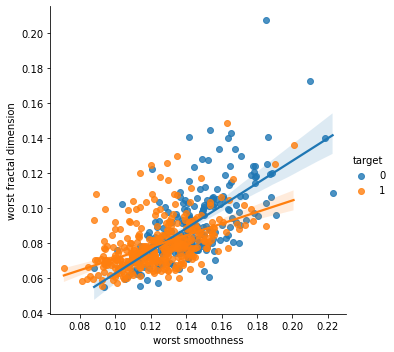

In [ ]:
### YOUR CODE HERE ###
import seaborn
seaborn.lmplot(x="worst smoothness", y = "worst fractal dimension", data=df, hue="target")

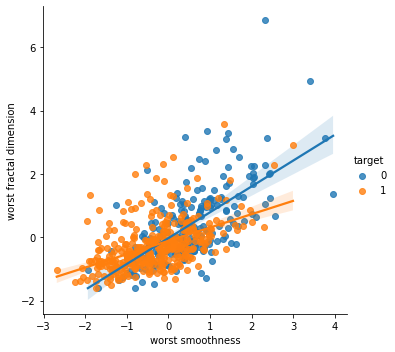

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_normalized = scaler.fit_transform(features)

df_normalized = pd.DataFrame(data=features_normalized, columns=dataset.feature_names)

df_normalized["target"] = dataset.target

seaborn.lmplot(x="worst smoothness", y = "worst fractal dimension", data=df_normalized, hue="target")

In [ ]:
df_normalized

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


### Based on your observation, what is the advantage of standardization?

Answer: In the unnormalized dataset, different features have very different scales. For example, the feature 'mean area' has an order of magnitude in the range of 10^2 - 10^3, whereas the feature 'mean smoothness' has an order of magnitude in the range of 10^(-2) - 10^(-1). Naturally, the features having values with high magnitudes would have larger variance, and thus, our classifier would focus on these features, and give very less weight to features with smaller variance due to small magnitudes, which would lead to inaccurate predictions on the test set. After normalizing with StandardScaler, all features obey a standard normal distribution and have a variance almost equal to 1. This prevents the classifier from being biased towards certain features by virtue of their magnitude, and helps maintain consistency in the dataset. 

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




[0.9171202531645569, 0.9170886075949367, 0.9272151898734178, 0.927120253164557, 0.919620253164557, 0.9246518987341773, 0.9321518987341773, 0.9321518987341773, 0.9246202531645569, 0.9346518987341772, 0.9346518987341772, 0.9321202531645569, 0.9221518987341772, 0.9296835443037976, 0.9221518987341772, 0.9246202531645569, 0.9120569620253164, 0.9195886075949368, 0.9120886075949368, 0.9145886075949367, 0.9070253164556963, 0.9095253164556961, 0.9070569620253165, 0.9070253164556961, 0.9045253164556962, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9095569620253163, 0.9045569620253164, 0.9070569620253165, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9070569620253164, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9070569620253165, 0.9095569620253166, 0.9095569620253166, 0.9095569620253166, 0.9020569620253165, 0.9070569620253165, 0.9020253164556962, 0.9095569620253166, 0.9045569620253164, 0.9070569620253164, 0

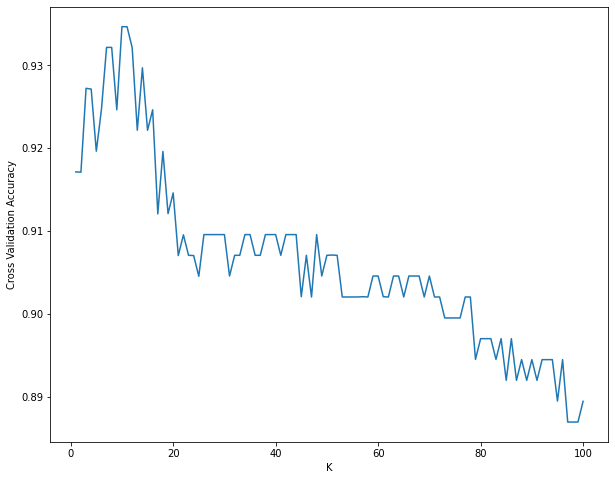

In [ ]:
### YOUR CODE HERE ###

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt


k_scores_train = []
k_scores_test = []

index = 0

for k in range(1, 101):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
    k_scores_train.append(scores['train_score'].mean())
    k_scores_test.append(scores['test_score'].mean())
    
    if (k_scores_test[k-1]>k_scores_test[index]):
        index = k-1

print(k_scores_test)

plt.figure(figsize=(10, 8))
plt.plot([i for i in range(1,101)], k_scores_test)
plt.xlabel('K')
plt.ylabel('Cross Validation Accuracy')

print("Best k:", (index+1))
print("Highest cross validation accuracy = ", k_scores_test[index])

plt.show()

**Best k: 10**

**Highest cross validation accuracy =  0.9346518987341772**

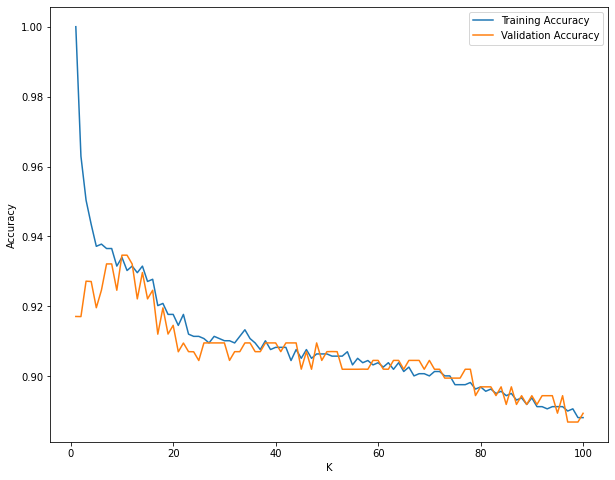

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot([i for i in range(1,101)], k_scores_train, label='Training Accuracy')
plt.plot([i for i in range(1,101)], k_scores_test, label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

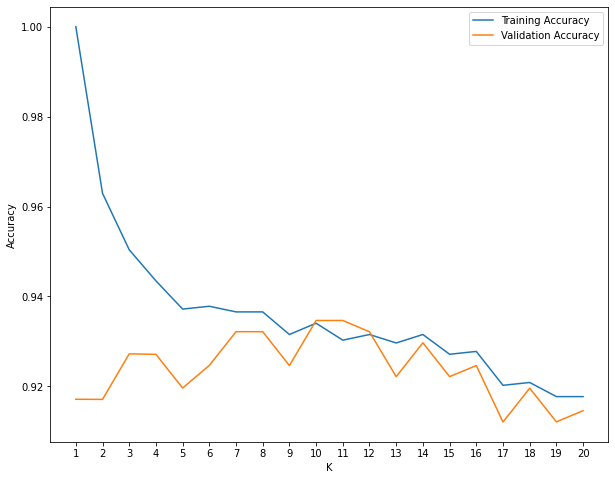

In [ ]:
# To find Overfit Region
plt.figure(figsize=(10, 8))
plt.plot([i for i in range(1,21)], k_scores_train[0:20], label='Training Accuracy')
plt.plot([i for i in range(1,21)], k_scores_test[0:20], label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(ticks = [i for i in range(1,21)])
plt.legend()
plt.show()

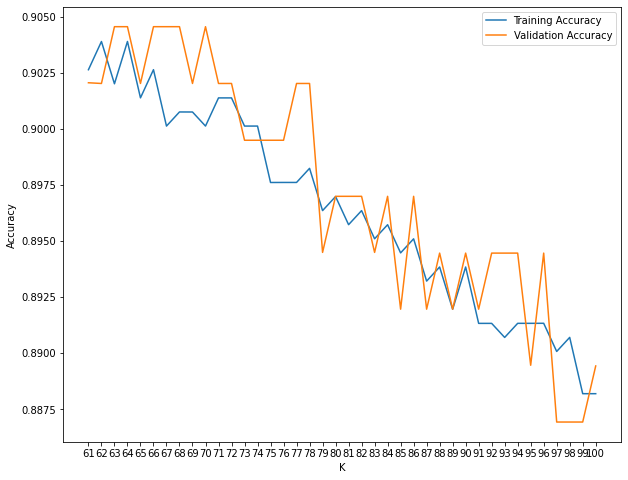

In [ ]:
# To find Underfit Region
plt.figure(figsize=(10, 8))
plt.plot([i for i in range(61,101)], k_scores_train[60:100], label='Training Accuracy')
plt.plot([i for i in range(61,101)], k_scores_test[60:100], label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(ticks = [i for i in range(61,101)])
plt.legend()
plt.show()

**Overfitting**: The model is overfitted for **k in the range [1,5]**, as the training accuracy is much higher than validation accuracy

**Underfitting**: The model is underfit for **k in the range [75,100]**, as the accuracy is consistently below 90%, and drastically drops as k increases

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score, the corresponding `k` (number of neighbours) value, and the removed feature in three lists.
6. Repeat Steps 3-5 until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, the list of corresponding mean cross-validation accuracies, and the list of `k` values when a feature was removed (i.e., the lists that were appended to in Step 5).

* Visualize your results by plotting the best mean cross-validation accuracy (based on the best value of `k`) on y axis vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)
importance = dt.feature_importances_
print(importance)

[0.         0.         0.         0.         0.         0.
 0.02112487 0.         0.01815419 0.         0.         0.
 0.         0.04749283 0.01058659 0.         0.         0.
 0.         0.01016418 0.         0.02784245 0.         0.08615112
 0.00990228 0.         0.01032055 0.728114   0.03014695 0.        ]


In [ ]:
def Feature_selector (X_train , y_train , tr=0.95):
### YOUR CODE HERE ###

    dt = DecisionTreeClassifier(random_state=0)
    dt.fit(X_train,y_train)
    importance = dt.feature_importances_

    removed_features = []
    accuracy_removed_feature = []
    best_k_feature_removed = []

    feature_names = np.array(dataset.feature_names)
    num_features = X_train.shape[1]

    original_accuracy = 0.9346518987341772

    while(num_features>1):

        removed_column = np.where(importance == np.amin(importance))[0][0]
        importance = np.delete(importance, removed_column)  #new importance list
        X_train = np.delete(X_train, removed_column, axis=1)
        removed_feature = feature_names[removed_column]
        feature_names = np.delete(feature_names,removed_column)

        k_scores_test = []
        index = 0
        for k in range(1, 101):
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)
            k_scores_test.append(scores['test_score'].mean())
            if (k_scores_test[k-1]>k_scores_test[index]):
                index = k-1
        
        best_k_feature_removed.append(index+1)
        accuracy_removed_feature.append(k_scores_test[index])
        removed_features.append(removed_feature)

        num_features -= 1

        if(k_scores_test[index] < original_accuracy*tr):
            break


    return removed_features, accuracy_removed_feature, best_k_feature_removed

In [ ]:
removed_features, accuracy_removed_feature, best_k_feature_removed = Feature_selector(X_train, y_train)

In [ ]:
removed_features = np.array(removed_features)
accuracy_removed_feature = np.array(accuracy_removed_feature)
best_k_feature_removed = np.array(best_k_feature_removed)

removed_features = np.reshape(removed_features, (removed_features.shape[0],1))
accuracy_removed_feature = np.reshape(accuracy_removed_feature, (accuracy_removed_feature.shape[0],1))
best_k_feature_removed = np.reshape(best_k_feature_removed, (best_k_feature_removed.shape[0],1))

removal_order = np.concatenate((removed_features, accuracy_removed_feature, best_k_feature_removed), axis=1)

In [ ]:
print(removal_order)

[['mean radius' '0.9346518987341772' '10']
 ['mean texture' '0.9346518987341772' '10']
 ['mean perimeter' '0.9321518987341773' '7']
 ['mean area' '0.9145886075949367' '34']
 ['mean smoothness' '0.9145886075949367' '34']
 ['mean compactness' '0.9145886075949367' '34']
 ['mean concave points' '0.9145886075949367' '34']
 ['mean fractal dimension' '0.9145886075949367' '34']
 ['radius error' '0.9145886075949367' '34']
 ['texture error' '0.9145886075949367' '34']
 ['perimeter error' '0.9145886075949367' '34']
 ['compactness error' '0.9145886075949367' '34']
 ['concavity error' '0.9145886075949367' '34']
 ['concave points error' '0.9145886075949367' '34']
 ['symmetry error' '0.9145886075949367' '34']
 ['worst radius' '0.9145886075949367' '34']
 ['worst perimeter' '0.9145569620253164' '61']
 ['worst compactness' '0.9145569620253164' '61']
 ['worst fractal dimension' '0.9145569620253164' '61']
 ['worst smoothness' '0.9145569620253164' '61']
 ['fractal dimension error' '0.9145569620253164' '61']

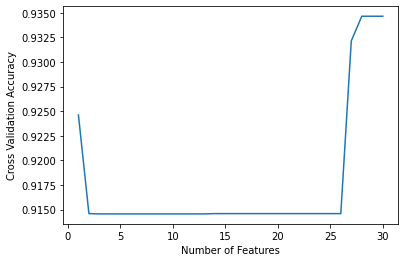

In [ ]:
accuracy_removed_feature_reverse = np.flip(accuracy_removed_feature)
accuracy_removed_feature_reverse = np.reshape(accuracy_removed_feature_reverse, (accuracy_removed_feature_reverse.shape[0]))
accuracy_removed_feature_reverse = accuracy_removed_feature_reverse.tolist()
accuracy_removed_feature_reverse.append(0.9346518987341772) #all features accuracy

plt.plot([i for i in range(1,31)], accuracy_removed_feature_reverse)
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Accuracy')
plt.show()

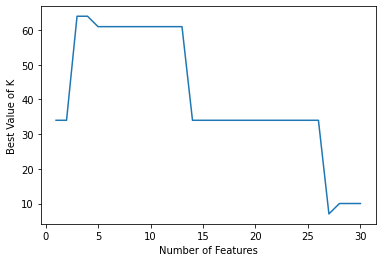

In [ ]:
best_k_feature_removed_reverse = np.flip(best_k_feature_removed)
best_k_feature_removed_reverse = np.reshape(best_k_feature_removed_reverse, (best_k_feature_removed_reverse.shape[0]))
best_k_feature_removed_reverse = best_k_feature_removed_reverse.tolist()
best_k_feature_removed_reverse.append(10) #best k for all features

plt.plot([i for i in range(1,31)], best_k_feature_removed_reverse)
plt.xlabel('Number of Features')
plt.ylabel('Best Value of K')
plt.show()

**Number of essential features for classification** can be taken as 28, as the accuracy remains constant from 30 features to 28 features, at 93.465%. However, if we allow for a small reduction in accuracy, we can also go with 27 features, at 93.215% accuracy.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but the model should still work well enough.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [ ]:
### YOUR CODE HERE ###
scaler = StandardScaler()

scaler = scaler.fit(X_train)

X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

removed_features_normalized, accuracy_removed_feature_normalized, best_k_feature_removed_normalized = Feature_selector(X_train_normalized, y_train)

In [ ]:
removed_features_normalized = np.array(removed_features_normalized)
accuracy_removed_feature_normalized = np.array(accuracy_removed_feature_normalized)
best_k_feature_removed_normalized = np.array(best_k_feature_removed_normalized)

removed_features_normalized = np.reshape(removed_features_normalized, (removed_features_normalized.shape[0],1))
accuracy_removed_feature_normalized = np.reshape(accuracy_removed_feature_normalized, (accuracy_removed_feature_normalized.shape[0],1))
best_k_feature_removed_normalized = np.reshape(best_k_feature_removed_normalized, (best_k_feature_removed_normalized.shape[0],1))

removal_order_normalized = np.concatenate((removed_features_normalized, accuracy_removed_feature_normalized, best_k_feature_removed_normalized), axis=1)

In [ ]:
print(removal_order_normalized)

[['mean radius' '0.9649683544303798' '8']
 ['mean texture' '0.9623417721518986' '4']
 ['mean perimeter' '0.9598417721518986' '8']
 ['mean area' '0.9598417721518988' '8']
 ['mean smoothness' '0.9572468354430381' '5']
 ['mean compactness' '0.9623417721518986' '7']
 ['mean concave points' '0.9598101265822784' '8']
 ['mean fractal dimension' '0.9598417721518986' '8']
 ['radius error' '0.9573417721518988' '8']
 ['texture error' '0.9598101265822784' '6']
 ['perimeter error' '0.9599050632911392' '12']
 ['compactness error' '0.9623101265822784' '4']
 ['concavity error' '0.9598101265822784' '3']
 ['concave points error' '0.9648417721518987' '4']
 ['symmetry error' '0.9674050632911392' '6']
 ['worst radius' '0.9623101265822784' '3']
 ['worst perimeter' '0.9547151898734179' '3']
 ['worst compactness' '0.952246835443038' '4']
 ['worst fractal dimension' '0.9598101265822784' '6']
 ['worst smoothness' '0.9573101265822783' '6']
 ['fractal dimension error' '0.957373417721519' '12']
 ['worst concavity'

In [ ]:
accuracy_removed_feature_normalized_reverse = np.flip(accuracy_removed_feature_normalized)
accuracy_removed_feature_normalized_reverse = np.reshape(accuracy_removed_feature_normalized_reverse, (accuracy_removed_feature_normalized_reverse.shape[0]))
accuracy_removed_feature_normalized_reverse = accuracy_removed_feature_normalized_reverse.tolist()

In [ ]:
k_scores_test = []
index = 0
for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train_normalized, y_train, cv=5, return_train_score=True)
    k_scores_test.append(scores['test_score'].mean())
    if (k_scores_test[k-1]>k_scores_test[index]):
        index = k-1

print(index+1)
accuracy_removed_feature_normalized_reverse.append(k_scores_test[index])
print(accuracy_removed_feature_normalized_reverse)

10
[0.9246202531645569, 0.9496518987341773, 0.9572784810126581, 0.9573101265822783, 0.967373417721519, 0.9674367088607594, 0.9599050632911392, 0.9549050632911392, 0.957373417721519, 0.9573101265822783, 0.9598101265822784, 0.952246835443038, 0.9547151898734179, 0.9623101265822784, 0.9674050632911392, 0.9648417721518987, 0.9598101265822784, 0.9623101265822784, 0.9599050632911392, 0.9598101265822784, 0.9573417721518988, 0.9598417721518986, 0.9598101265822784, 0.9623417721518986, 0.9572468354430381, 0.9598417721518988, 0.9598417721518986, 0.9623417721518986, 0.9649683544303798, 0.9674367088607594]


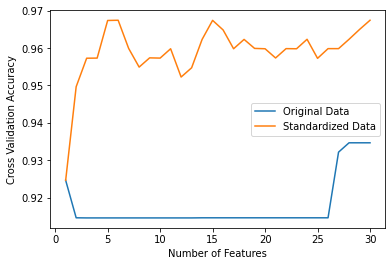

In [ ]:
plt.plot([i for i in range(1,31)], accuracy_removed_feature_reverse, label='Original Data')  #original data
plt.plot([i for i in range(1,31)], accuracy_removed_feature_normalized_reverse, label='Standardized Data')  #standardized data
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Accuracy')
plt.legend()
plt.show()

Standardization helped the model and led to significant increase in accuracy. Highest cross validation accuracy is seen with standardized data for:

Number of Features = 6

Accuracy = 96.74367088607594%

K = 4

Features included: 'mean symmetry', 'mean concavity', 'worst texture', 'worst symmetry', 'area error', 'worst area'


## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [ ]:
### YOUR CODE HERE ###

scores_all = []

for depth in range(1,16):
    scores_list = []
    for split in range(2,16):
        dt = DecisionTreeClassifier(splitter='best', max_depth=depth, min_samples_split=split, random_state=0)
        scores = cross_validate(dt, X_train_normalized, y_train, cv=5, return_train_score=True)
        scores_list.append(scores['test_score'].mean())
    scores_all.append(scores_list)

print(scores_all)
scores_all = np.array(scores_all)
highest_score = np.max(scores_all)

index = np.where(scores_all==highest_score)


best_depth = index[0][0]+1
best_split = index[1][0]+2

[[0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076, 0.901993670886076], [0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962, 0.9045253164556962], [0.9246202531645571, 0.9246202531645571, 0.9246202531645571, 0.9246202531645571, 0.9246202531645571, 0.9246202531645571, 0.9171202531645569, 0.9171202531645569, 0.9171202531645569, 0.9171202531645569, 0.9146202531645569, 0.9146202531645569, 0.9146202531645569, 0.9146202531645569], [0.9271518987341774, 0.9271518987341774, 0.9296518987341773, 0.9296518987341773, 0.9296518987341773, 0.9296518987341773, 0.9296518987341773, 0.9296518987341773, 0.9296

In [ ]:
print("Max Accuracy of Decision Tree = ", highest_score)
print("Depth = ", best_depth)
print("Min Samples Split = ", best_split)

Max Accuracy of Decision Tree =  0.9321518987341773
Depth =  5
Min Samples Split =  8


In [ ]:
print("Highest Accuracy with Decision Tree Classifier = ",scores_all[4][6])

Highest Accuracy with Decision Tree Classifier =  0.9321518987341773


The KNN classifier with all features and K = 10 on the Standardized dataset gives higher accuracy of 96.74367088607594% than the Decision Tree Classifier with Depth = 5 and Min Samples Split = 8 on the Standardized dataset, with an accuracy of 93.21518987341773%

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

Classifier used is KNN with all features and K = 10

In [ ]:
### YOUR CODE HERE ###
import sklearn.metrics as metrics

knn = KNeighborsClassifier(n_neighbors=10)

knn = knn.fit(X_train_normalized, y_train)

y_pred = knn.predict(X_test_normalized)

print("Accuracy = ", (y_test==y_pred).sum()/len(y_test))

Accuracy =  0.9590643274853801


References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/